# A python notebook for ArcScan at ArcGIS PRO
### Cuaderno de Python para ArcScan con ArcGIS PRO

###### Developed: Juan de Dios Fernandez V. 
###### By: MasterGIS 
###### Date: 29/01/2024
###### Version : 1.0 
© Author(s) 2024. This work is distributed underthe Creative Commons Attribution 4.0 License.

### Instructions

###### Raster must be 8bit - unsigned integer // El raster debe estar en 8bits entero sin signo
###### Raster must be properly georeferenced  // El raster debe estar correctamente georreferenciado

### Install required packages  // Instalar paquetes requeridos

In [ ]:
!pip install rasterio geopandas matplotlib numpy skimage opencv-python

### Import required packages // Importando paquetes requeridos

In [15]:
import rasterio
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import threshold_otsu
from skimage.filters import sobel
import cv2


### Path to raster tif // Ruta al raster

In [6]:
tiff_path = r'C:\Users\your_user\IMG_002.tif'

### Read raster tif and edge detection // Lectura del raster y detección de bordes

In [8]:
with rasterio.open(tiff_path) as src:
    raster_data = src.read(1) 
    """ the open function allows to open tif raster format then the read function opens the first band (1), 
        band number is not important. 
    """
    # Aplicar la umbralización de Otsu
    """ Otsu threshold is applied by threshold_otsu function  from skimage then a binary image is made"""
    otsu_threshold = threshold_otsu(raster_data)
    binary_image = raster_data > otsu_threshold
    # Aplicar Sobel a la imagen binaria
    """ The edges are detected by sobel method"""
    edges = sobel(binary_image)
    # Convertir a imagen binaria para detección de contornos
    
    edges_binary = (edges > np.percentile(edges, 75)).astype(np.uint8)  # Ajusta el percentil según sea necesario

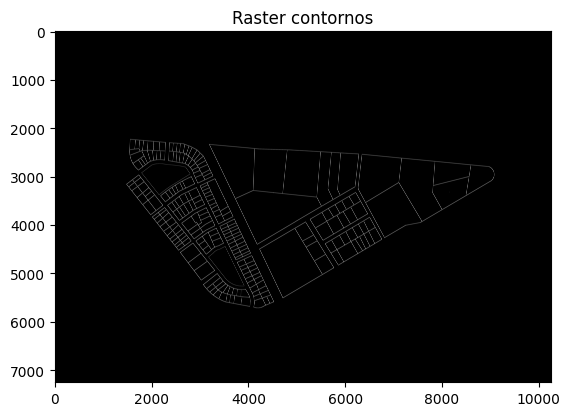

In [11]:
    # Visualizar el resultado
    plt.plot(1, 2, 2)
    plt.imshow(edges_binary, cmap='gray')
    plt.title('Raster contornos')
    plt.show()

### Inside and outside edges //Delimitación de contornos internos y externos 

In [19]:
    contours, _ = cv2.findContours(edges_binary, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
"""
 CHAIN_APPROX_SIMPLE:  Delete unnecessary vertex points Comprime los contornos eliminando todos los puntos redundantes y guardando solo los puntos esenciales. 
 RETR_CCOMP: Outside and insede edges // Bordes internos y externos.
"""
# hasta esta sección estamos dentro del raster abierto por rasterio

###  Edge polygonization // Digitalización de bordes

In [20]:
gdf = gpd.GeoDataFrame(columns=['geometry'], crs=src.crs.to_string())
line_geometries = []

for contour in contours:
    points = [src.xy(point[0][1], point[0][0]) for point in contour]
    if len(points) > 1:
        line = LineString(points)
        line_geometries.append({'geometry': line})

temp_gdf = gpd.GeoDataFrame(line_geometries, crs=src.crs.to_string())
gdf = pd.concat([gdf, temp_gdf], ignore_index=True)

In [ ]:
output_path = r'tu_ruta\contornos_bordes2.shp'
gdf.to_file(output_path)